# The goal of this project is to complete tasks based off the 538 article to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

# PART ONE: Understanding the data.

## This is the data behind the article on 538's website. There are two csv files, one with Fandango's stars and Displayed ratings, and the other with the aggregate data for movie ratings from other sites like IMDB or Rotten Tomatoes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is the data frame for the aggregate data from other sites
other_sites_df = pd.read_csv("all_sites_scores.csv")

In [3]:
other_sites_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [4]:
other_sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [5]:
# This is the data from Fandango's site
fandango_df = pd.read_csv("fandango_scrape.csv")

In [6]:
fandango_df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
fandango_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [8]:
fandango_df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


### TASK: Let's explore the relationship between popularity of a film and its rating. This will be shown by a scatterplot that shows the relationship between rating and votes

<Axes: xlabel='RATING', ylabel='VOTES'>

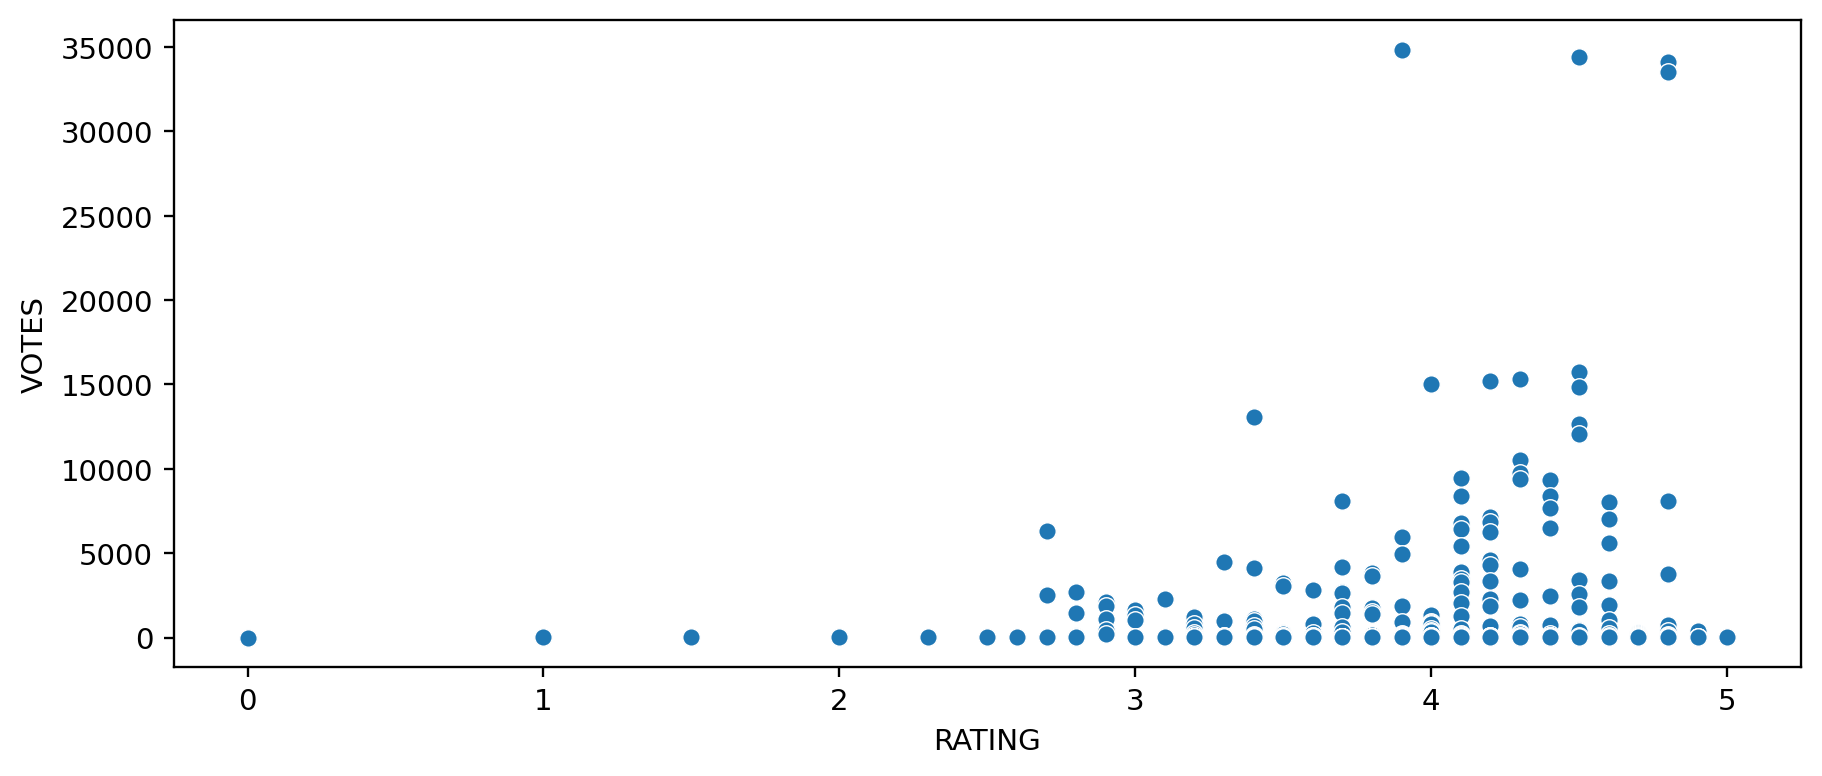

In [9]:
plt.figure(figsize=(10,4),dpi=210)
sns.scatterplot(data=fandango_df,x="RATING",y="VOTES")

### TASK: CALCULATE A CORRELATION BETWEEN COLUMNS

In [10]:
fandango_df.corr(numeric_only="int")

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


### TASK: ASSUMING THAT EVERY ROW IN THE FILM TITLE COLUMN HAS THE SAME FORMAT "Film Title Name (Year)", CREATE A NEW COLUMN THAT IS ABLE TO STRIP THE YEAR FROM THE TITLE STRINGS AND SET THIS NEW COLUMN AS YEAR

In [11]:
def year(film):
    x = film.split()
    return x[-1][1:5]

In [12]:
other_sites_df["YEAR"] = other_sites_df["FILM"].apply(year)

In [13]:
other_sites_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,2015


In [14]:
other_sites_df = other_sites_df.drop("YEAR",axis=1)

In [15]:
fandango_df["YEAR"] = fandango_df["FILM"].apply(year)

In [16]:
fandango_df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### TASK: HOW MANY MOVIES ARE IN THE FANDANGO DATAFRAME PER YEAR?

In [17]:
fandango_df["YEAR"].value_counts()

YEAR
2015    478
2014     23
2012      7
2016      1
1964      1
Name: count, dtype: int64

### TASK: VISUALIZE THE COUNT OF MOVIES PER YEAR WITH A PLOT

<Axes: xlabel='YEAR', ylabel='count'>

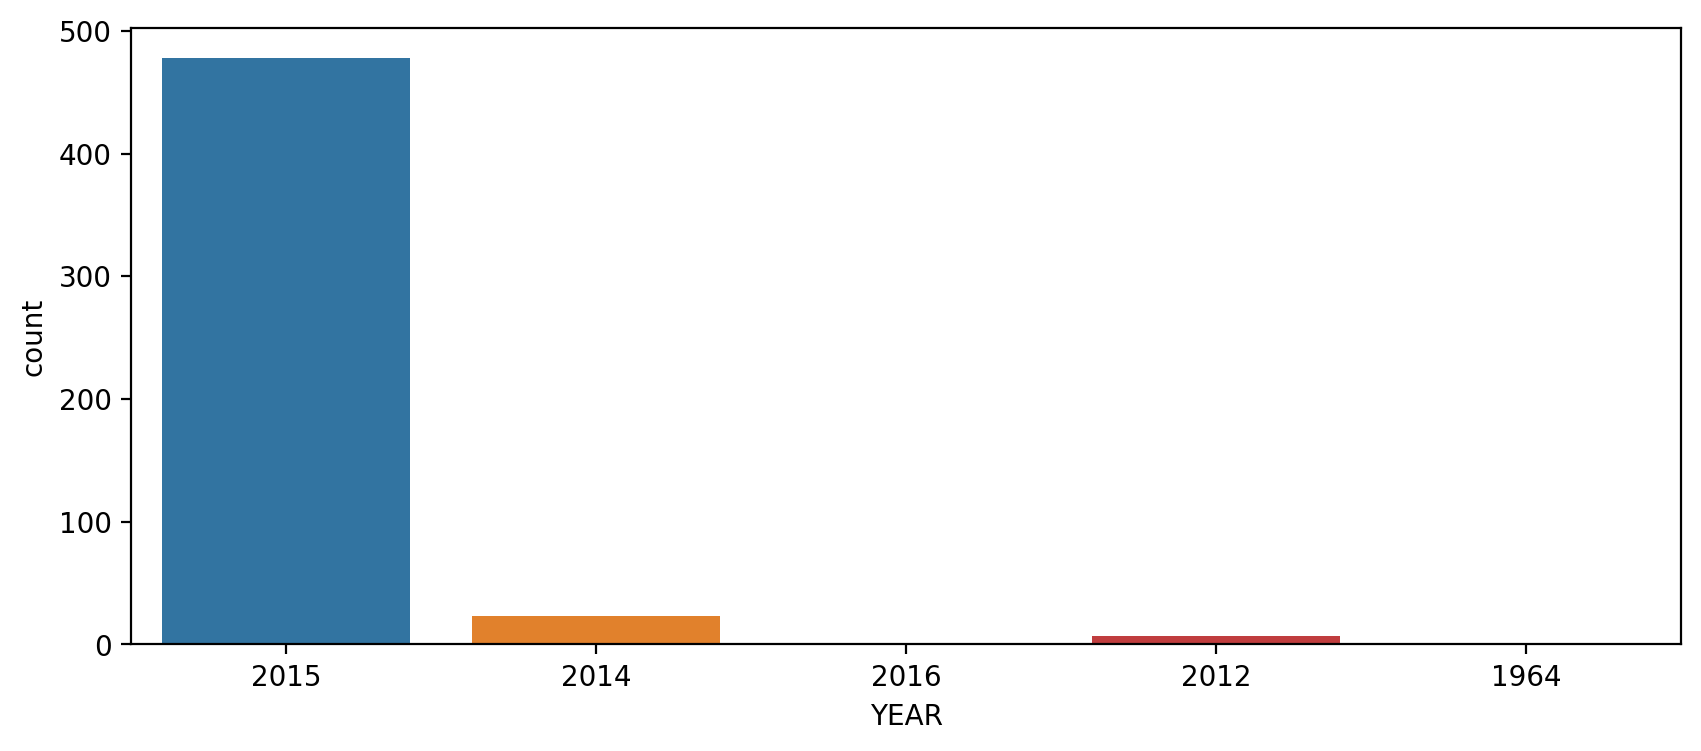

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=fandango_df,x="YEAR")

### TASK: WHAT ARE THE 10 MOVIES WITH THE HIGHEST NUMBER OF VOTES?

In [19]:
fandango_df.nlargest(n=10,columns="VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### TASK: HOW MANY MOVIES HAVE ZERO VOTES?

In [20]:
len(fandango_df[fandango_df["VOTES"] == 0])

73

### TASK: CREATE A DATAFRAME OF ONLY REVIEWED FILMS BY REMOVING ANY FILMS THAT HAVE ZERO VOTES

In [21]:
reviewed_films_df = fandango_df[fandango_df["VOTES"] > 0]

In [22]:
reviewed_films_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


### TASK: CREATE A KDE PLOT THAT DISPLAYS THE DISTRIBUTION OF RATINGS TAH ARE DISPLAYED(STARS) VERSUS WHAT THE TRUE RATING WAS FROM VOTES (RATINGS). CLIP THE KDEs TO 0 - 5

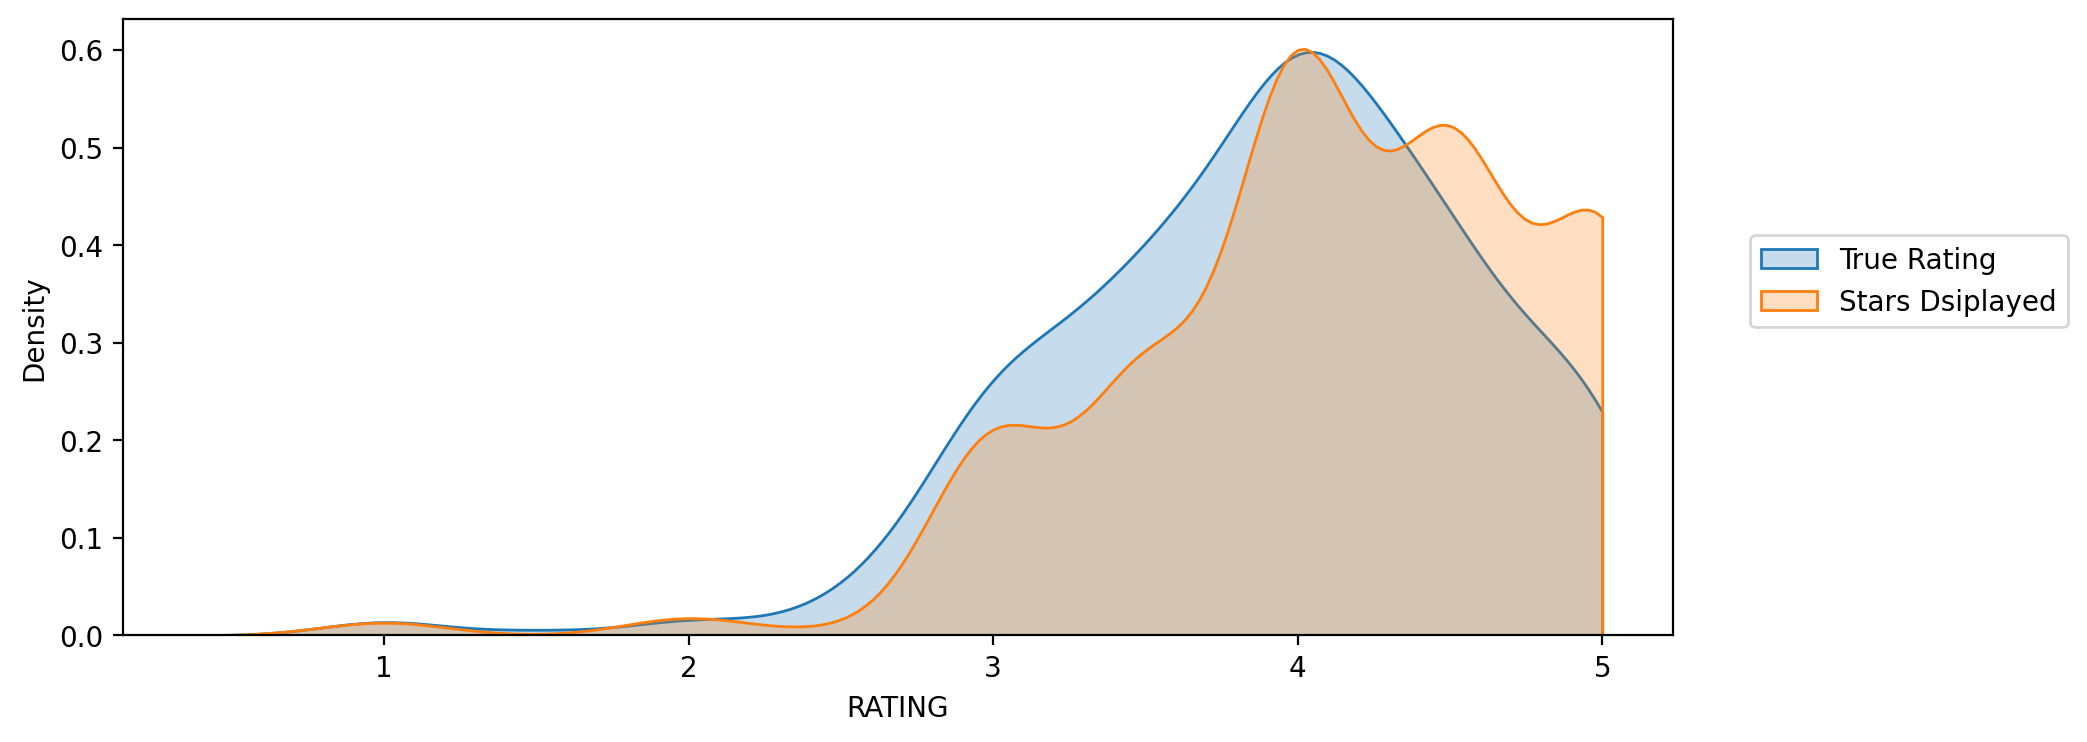

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=reviewed_films_df,x="RATING",clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(data=reviewed_films_df,x="STARS",clip=[0,5],fill=True,label="Stars Dsiplayed")

plt.legend(loc=(1.05,0.5))

### TASK: LET'S NOW ACTUALLY QUANTIFY THIS DISCREPANCY. CREATE A NEW COLUMN OF THE DIFFERENCE BETWEEN STARS DISPLAYED VERSUS THE TRUE RATING. CALCULATE THIS DIFFERENCE WITH STARS-RATING AND ROUND THESE DIFFERENCES TO THE NEAREST DECIMAL POINT

In [24]:
reviewed_films_df["STARS_DIFF"] = round(reviewed_films_df["STARS"] - reviewed_films_df["RATING"],1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7456\4105505327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films_df["STARS_DIFF"] = round(reviewed_films_df["STARS"] - reviewed_films_df["RATING"],1)


In [25]:
reviewed_films_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


### TASK: CREATE A COUNT PLOT TO DISPLAY THE NUMBER OF TIMES A CERTAIN DIFFERENCE OCCURS

<Axes: xlabel='STARS_DIFF', ylabel='count'>

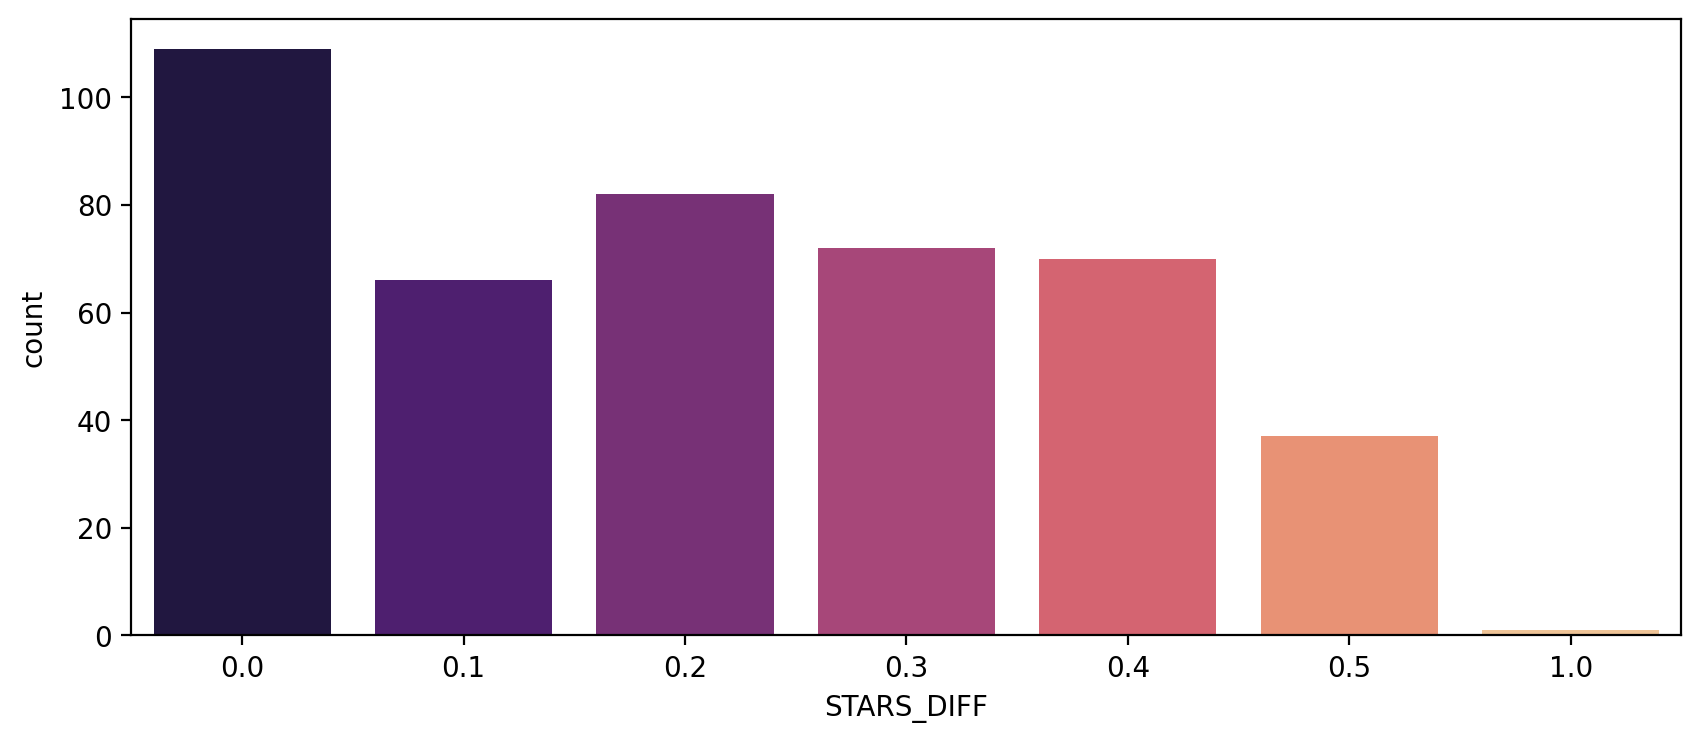

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=reviewed_films_df,x="STARS_DIFF",palette="magma")

### TASK: WE CAN SEE FROM THE PLOT THAT ONE MOVIE WAS DISPLAYING OVER A 1 STAR DIFFERENCE THAN ITS TRUE RATING! WHAT MOVIE HAD THIS CLOSE TO A ONE STAR DIFFERENTIAL?

In [27]:
reviewed_films_df[reviewed_films_df["STARS_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# PART TWO: Comparison of Fandango Ratings to Other Sites


## Let's now compare the scores from Fandango to other movie sites and see how they compare

### TASK: EXPLORE THE DATAFRAME OF THE INFO FROM OTHER SITES

In [28]:
other_sites_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [29]:
other_sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [30]:
other_sites_df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [31]:
other_sites_df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

## Rotten Tomatoes
Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews(ratings published by official critics) and user reviews.

### TASK: CREATE A SCATTERPLOT EXPLORING THE RELATIONSHIP BETWEEN RT CRITIC REVIEWS AND RT USER REVIEWS

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

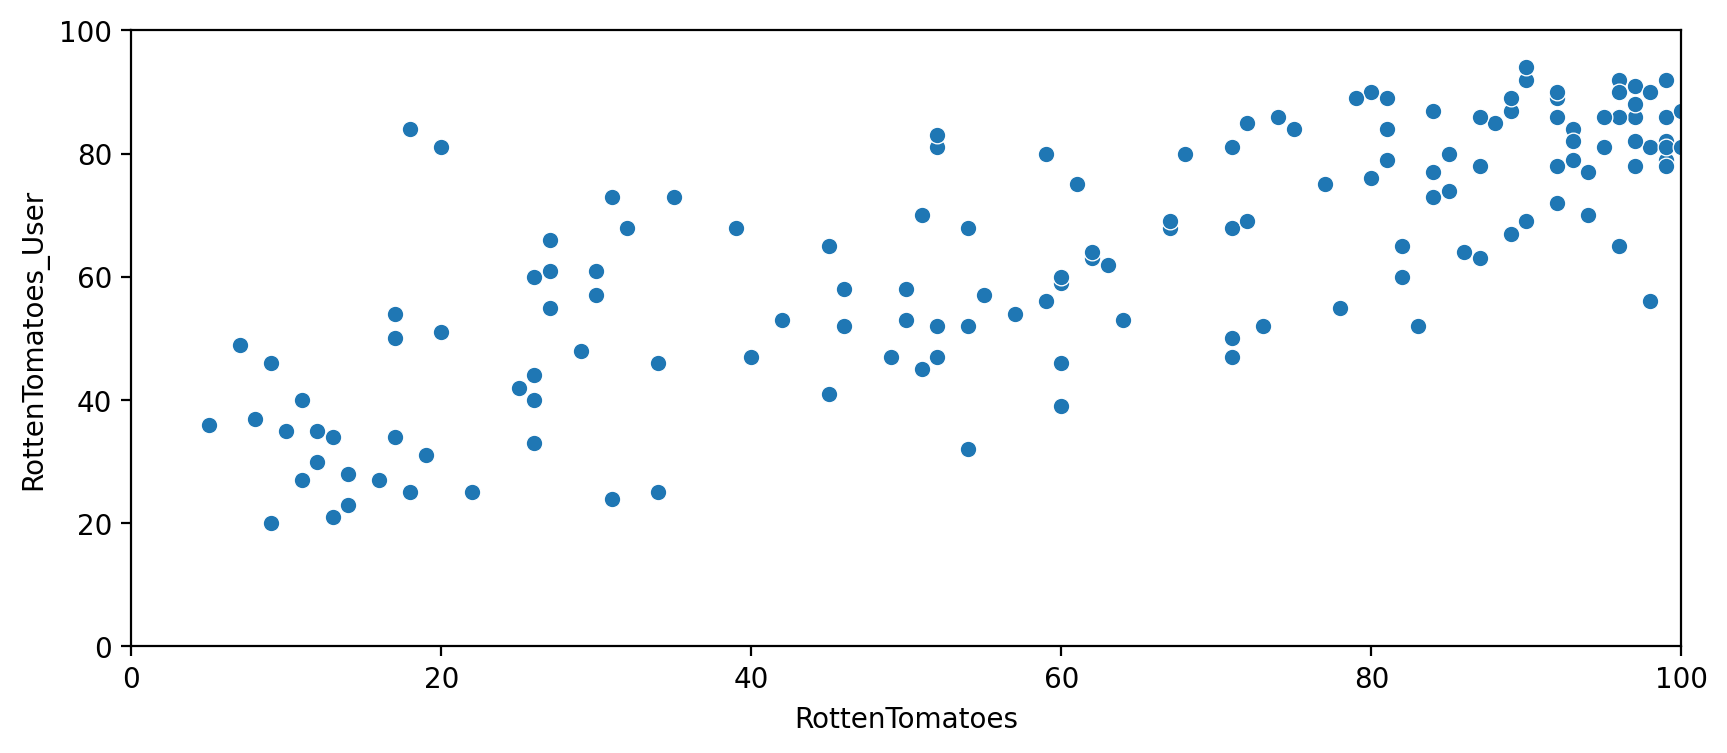

In [32]:
plt.figure(figsize=(10,4),dpi=200)
plt.xlim(0,100)
plt.ylim(0,100)
sns.scatterplot(data=other_sites_df,x="RottenTomatoes",y="RottenTomatoes_User")

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes - RottenTomatoes_User. Note that Rotten_Diff here is Critics - User score. So values closer to 0 means agreement between critics and users. Larger positive values means critics rated musch higher than the users. Larger negative values means uses rated much higher than critics.

### TASK: CREATE A NEW COLUMN BASED OFF THE DIFFERENCE BETWEEN CRITICS RATINGS AND USERS RATINGS FOR ROTTEN TOMATOES. CALCULATE THIS WITH ROTTENTOMATOES-ROTTENTOMATOES_USER

In [33]:
other_sites_df["Rotten_Diff"] = other_sites_df["RottenTomatoes"] - other_sites_df["RottenTomatoes_User"]

In [34]:
other_sites_df.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12


Let's now compare the overall mean difference. Since we are dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

### TASK: CALCULATE THE MEAN ABSOLUTE DIFFERENCE BETWEEN RT SCORES AND RT USER SCORES AS DESCRIBED ABOVE

In [35]:
other_sites_df["Rotten_Diff"].apply(abs).mean()

15.095890410958905

### TASK: PLOT THE DIFFERENCES BETWEEN RT CRITICS SCORE AND RT USER SCORE. THERE SHOULD BE NEGATIVE VALUES IN THIS DISTRIBUTION PLOT.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

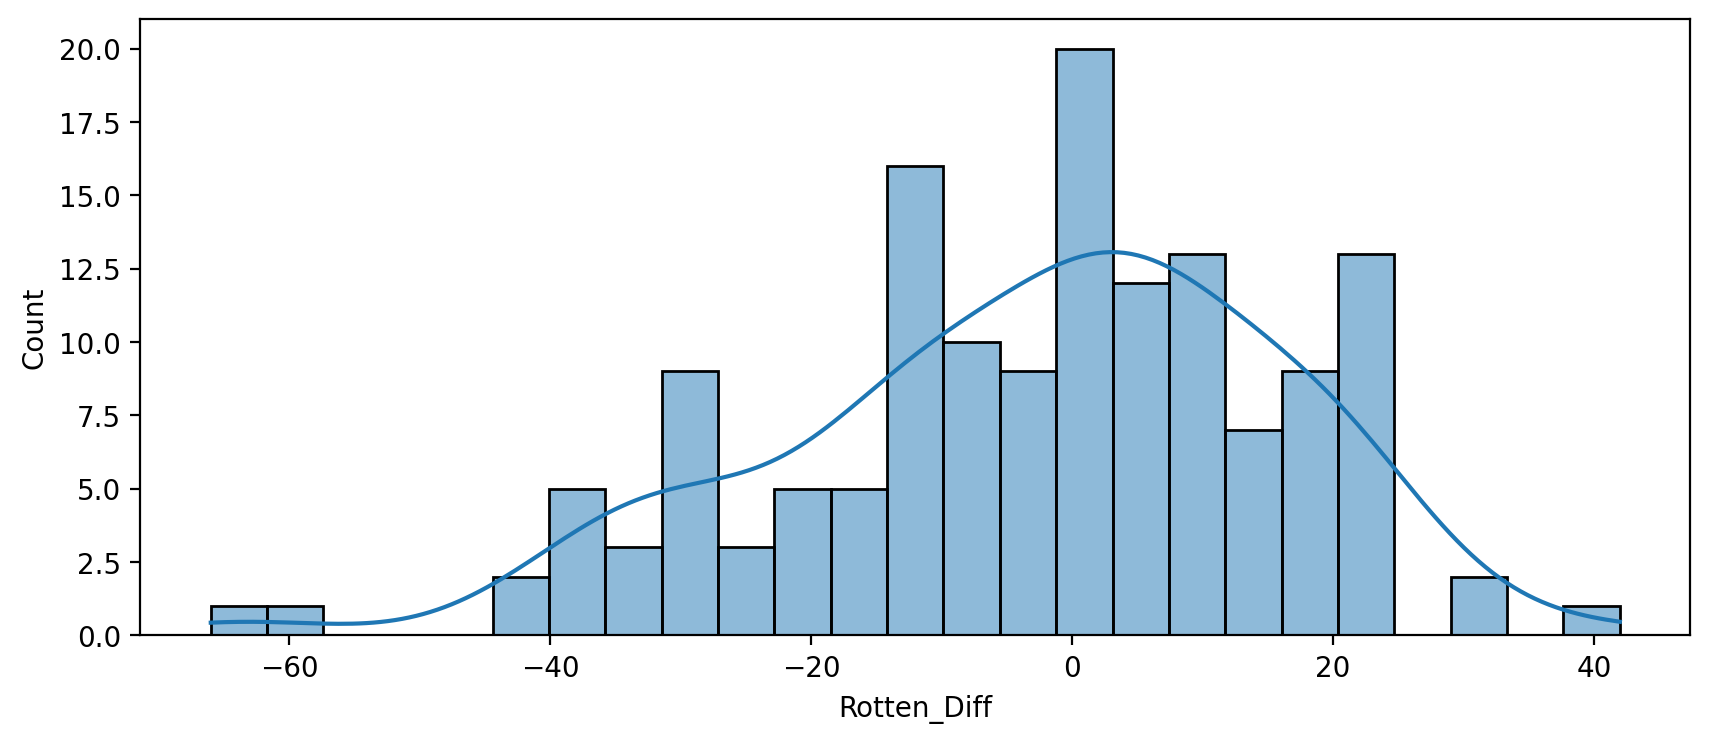

In [36]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=other_sites_df,x="Rotten_Diff",kde=True,bins=25)

### TASK: NOW CREATE A DISTRIBUTION SHOWING THE ABSOLUTE VALUE DIFFERENCE BETWEEN CRITICS AND USERS ON ROTTEN TOMATOES

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

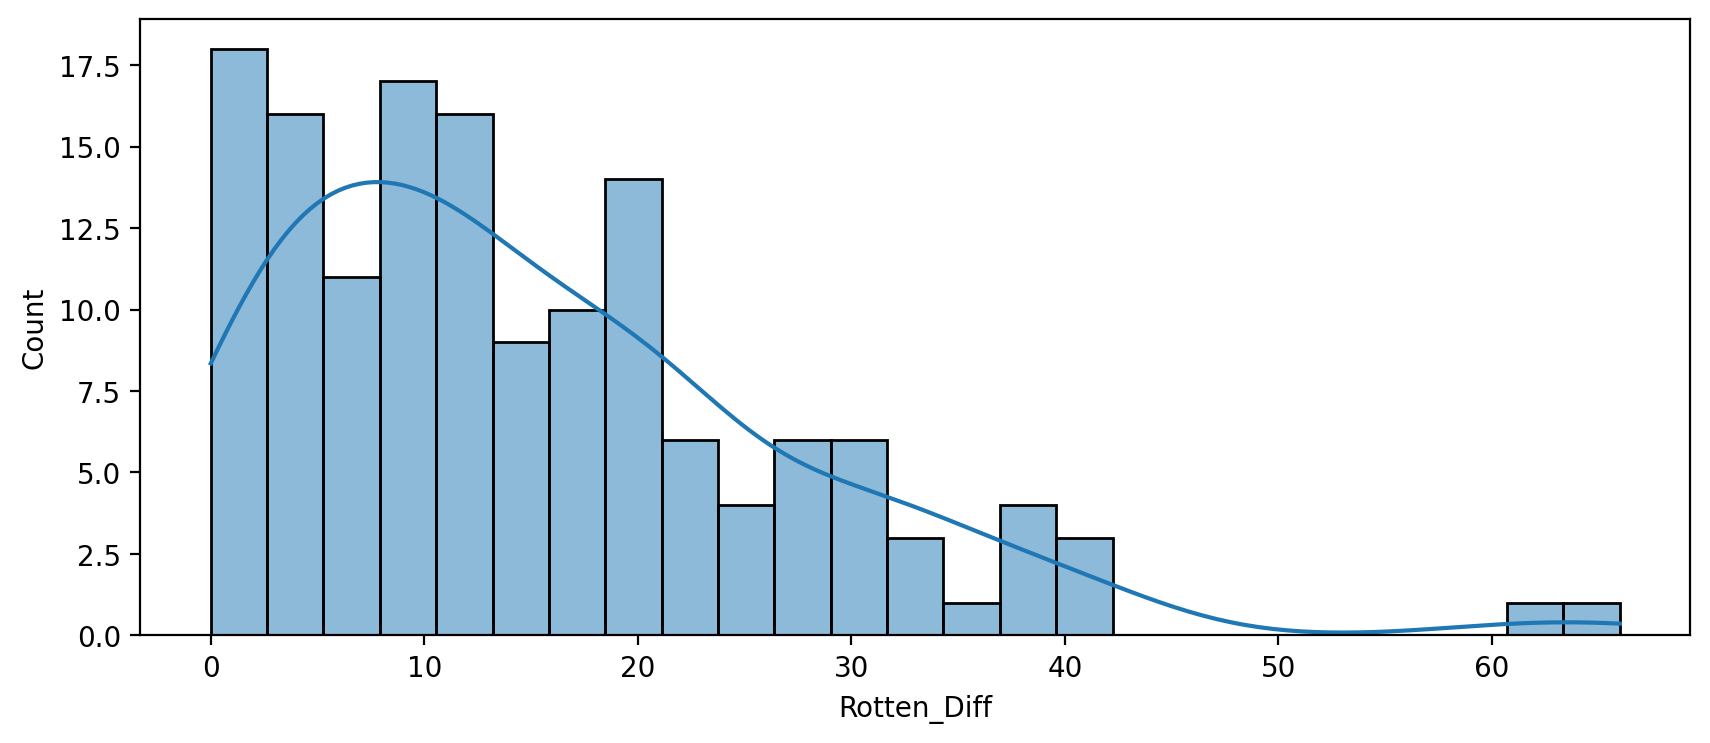

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=other_sites_df,x=other_sites_df["Rotten_Diff"].apply(abs),kde=True,bins=25)

### Let's find out which movies are causing the largest difference. First we show the top 5 movies with the largest negative difference between Users and RT Critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did


### TASK: WHAT ARE THE TOP FIVE MOVIES THAT USERS RATED HIGHER THAN CRITICS ON AVERAGE

In [38]:
other_sites_df.nsmallest(n=5,columns="Rotten_Diff")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


### TASK: NOW SHOW THE TOP 5 MOVIES CRITICS SCORES HIGHER THAN USERS ON AVERAGE

In [39]:
other_sites_df.nlargest(n=5,columns="Rotten_Diff")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. MetaCritic also shows an average user rating versus thier official displayed rating

### TASK: DISPLAY A SCATTERPLOT OF THE METACRITIC RATING VERSUS THE METACRITIC USER RATING

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

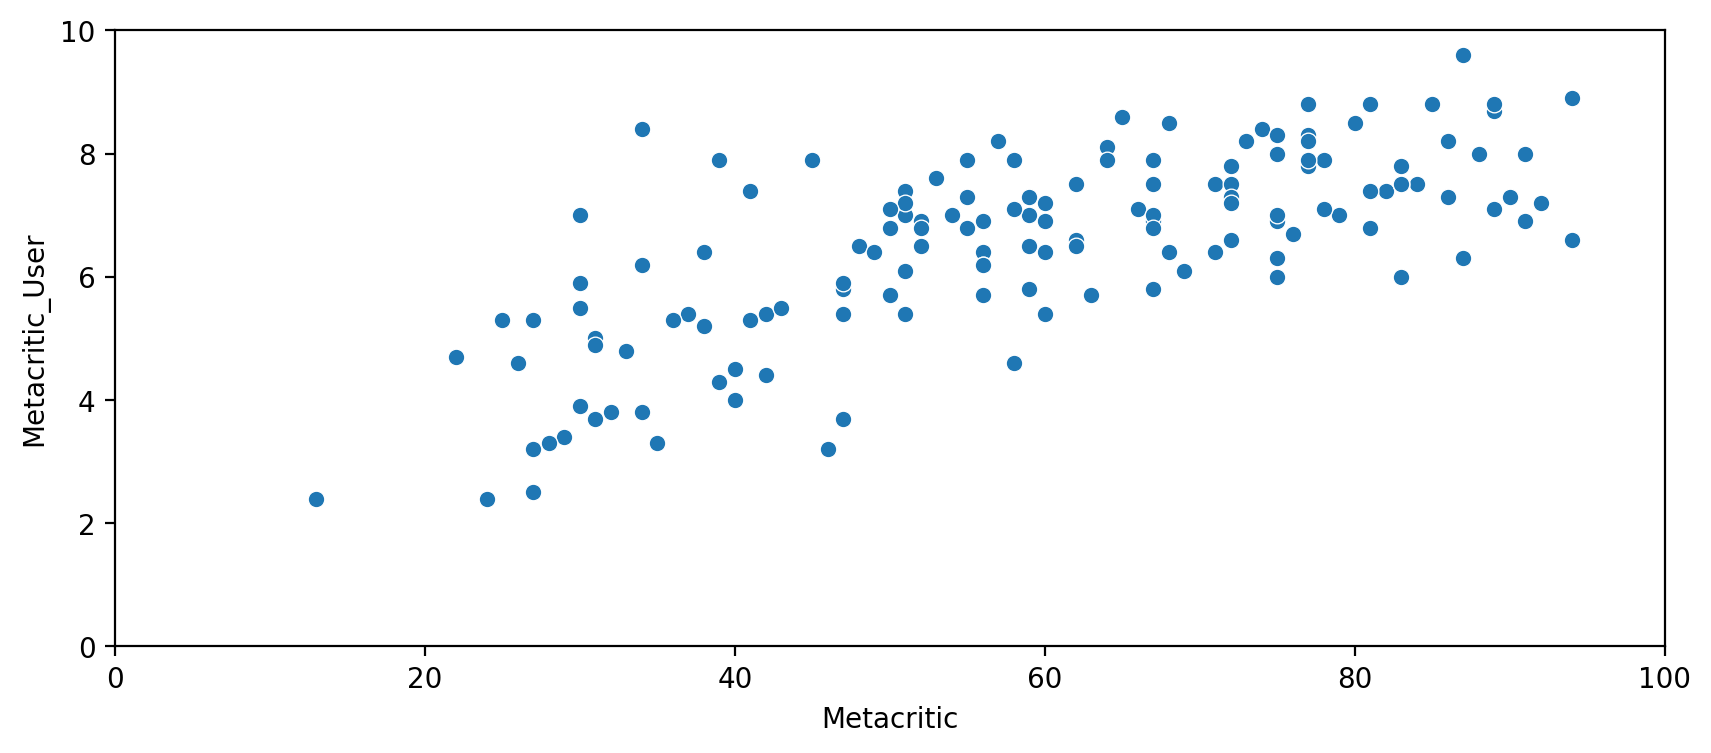

In [40]:
plt.figure(figsize=(10,4),dpi=200)
plt.ylim(0,10)
plt.xlim(0,100)
sns.scatterplot(data=other_sites_df,x="Metacritic",y="Metacritic_User")

## IMDB

Finally let's explore the IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies

### TASK: CREATE A SCATTERPLOT FOR THE RELATIONSHIP BETWEEN VOTE COUNTS ON META CRITIC VERSUS VOTE COUNTS  ON IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

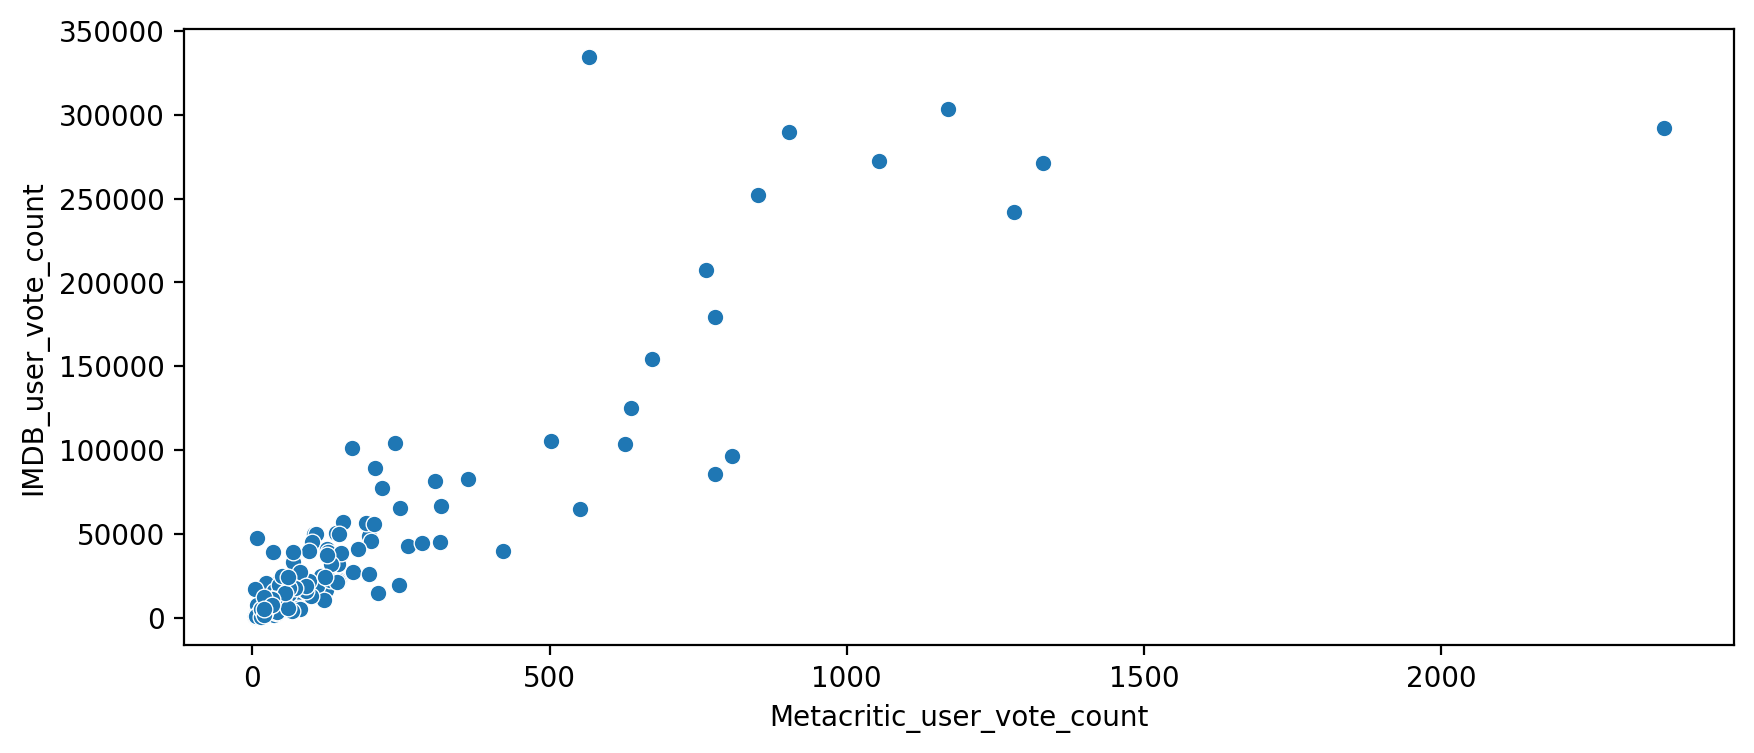

In [41]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=other_sites_df,x="Metacritic_user_vote_count",y="IMDB_user_vote_count")

### Notice that there are two outliers in the plot shown above. The movie with the highest vote count on IMDB only has about 500 MetaCritic ratings. What is this movie?

### TASK: WHAT MOVIE HAS THE HIGHEST IMDB USER VOTE COUNT?

In [42]:
other_sites_df.nlargest(n=1,columns="IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### TASK: WHAT MOVIE HAS THE HIGHEST METACRITIC USER VOTE COUNT?

In [43]:
other_sites_df.nlargest(n=1,columns="Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# PART THREE: Comparison of Fandango Scores vs. Other Sites

## Finally let's begin to explore whether or not Fnadango artificially displays higher ratings than warranted to boost ticket sales

### TASK: COMBINE THE FANDANGO DATAFRAME WITH THAT OF THE OTHER SITES. NOT EVERY MOVIE IN THE FANDANGO TABLE IS IN THE ALL SITES TABLE, SINCE SOME FANDANGO MOVIES HAVE VERY LITTLE OR NO REVIEWS. WE ONLY WANT TO COMPARE MOVIES THAT ARE IN BOTH DATAFRAME, SO DO AN INNER MERGE TO MERGE TOGETHER BOTH DATAFRAMES BASED ON THE FILM COLUMNS

In [44]:
merged_df = pd.merge(fandango_df,other_sites_df,how="inner",on="FILM")

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [46]:
merged_df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


## Normalize columns to Fandango Stars and Ratings 0 - 5

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these valuse so that they all fall between 0-5 stars and the relationship between reviews stays the same.

### TASK: CREATE NEW NORMALIZED COLUMNS FOR ALL RATINGS SO THEY MATCH UP WITHIN THE 0-5 STAR RANGE SHOWN ON FANDANGO.

In [47]:
merged_df["RottenTomatoes_Norm"] = round(merged_df["RottenTomatoes"] / 20,1)
merged_df["RottenTomatoes_User_Norm"] = round(merged_df["RottenTomatoes_User"] / 20,1)
merged_df["Metacritic_Norm"] = round(merged_df["Metacritic"] / 20,1)
merged_df["Metacritic_User_Norm"] = round(merged_df["Metacritic_User"] / 2,1)
merged_df["IMDB_Norm"] = round(merged_df["IMDB"] / 2,1)

In [48]:
merged_df.head() 

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoes_Norm,RottenTomatoes_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### TASK: CREATE A NORM_SCORES DATAFRAME THAT ONY CONTAINS THE NORMALIZED RATINGS. INCLUDE BOTH STARS AND RATINGS FROM THE ORIGINAL FANDANGO TABLE

In [49]:
norm_scores_df = merged_df.drop(["FILM","VOTES","YEAR","RottenTomatoes","RottenTomatoes_User",
                                "Metacritic","Metacritic_User","IMDB","Metacritic_user_vote_count",
                                "IMDB_user_vote_count","Rotten_Diff"],axis=1)

In [50]:
norm_scores_df

,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


## Comparing Distribution of Scores Across Sites

Now the moment of truth. Does Fandango display abnormally high ratings? We already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?

### TASK: CREATE A PLOT CONPARING THE DISTRIBUTION OF NORMAILIZED RATINGS ACROSS ALL SITES.

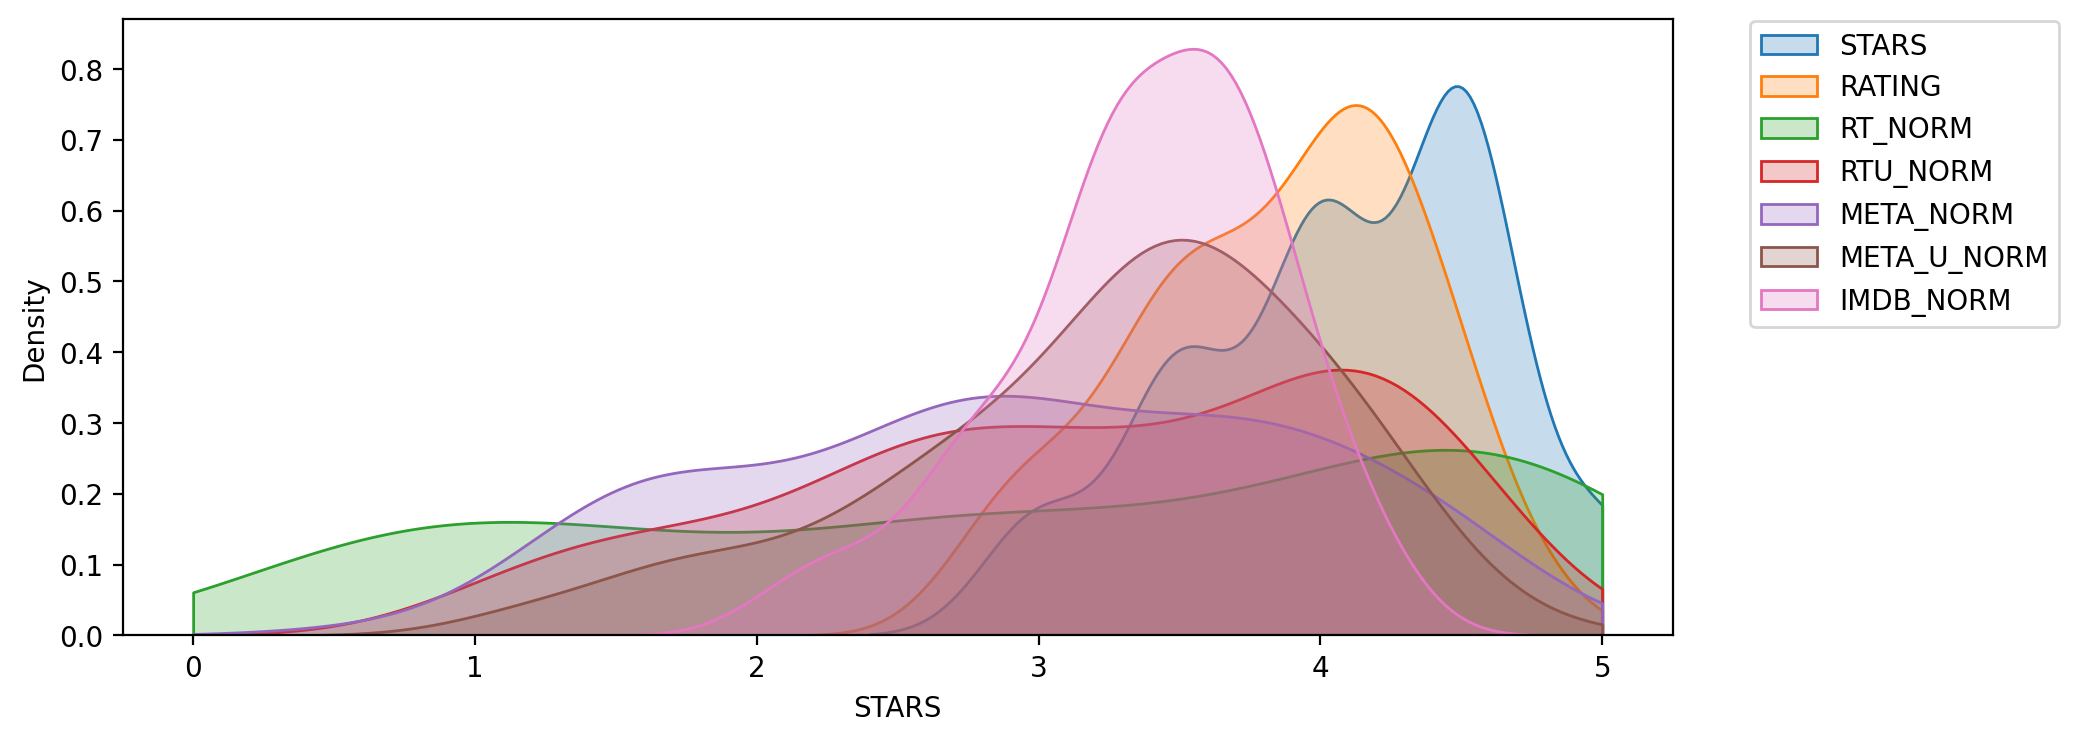

In [51]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores_df,x="STARS",clip=[0,5],fill=True,label="STARS")
sns.kdeplot(data=norm_scores_df,x="RATING",clip=[0,5],fill=True,label="RATING")
sns.kdeplot(data=norm_scores_df,x="RottenTomatoes_Norm",clip=[0,5],fill=True,label="RT_NORM")
sns.kdeplot(data=norm_scores_df,x="RottenTomatoes_User_Norm",clip=[0,5],fill=True,label="RTU_NORM")
sns.kdeplot(data=norm_scores_df,x="Metacritic_Norm",clip=[0,5],fill=True,label="META_NORM")
sns.kdeplot(data=norm_scores_df,x="Metacritic_User_Norm",clip=[0,5],fill=True,label="META_U_NORM")
sns.kdeplot(data=norm_scores_df,x="IMDB_Norm",clip=[0,5],fill=True,label="IMDB_NORM")

plt.legend(loc=(1.05,0.5))

## Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare the two.

### TASK: CREATE A KDE PLOT THAT COMPARES THE DISTRIBUTION OF RT CRITIC RATINGS AGAINST THE STARS DISPLAYED BY FANDANGO

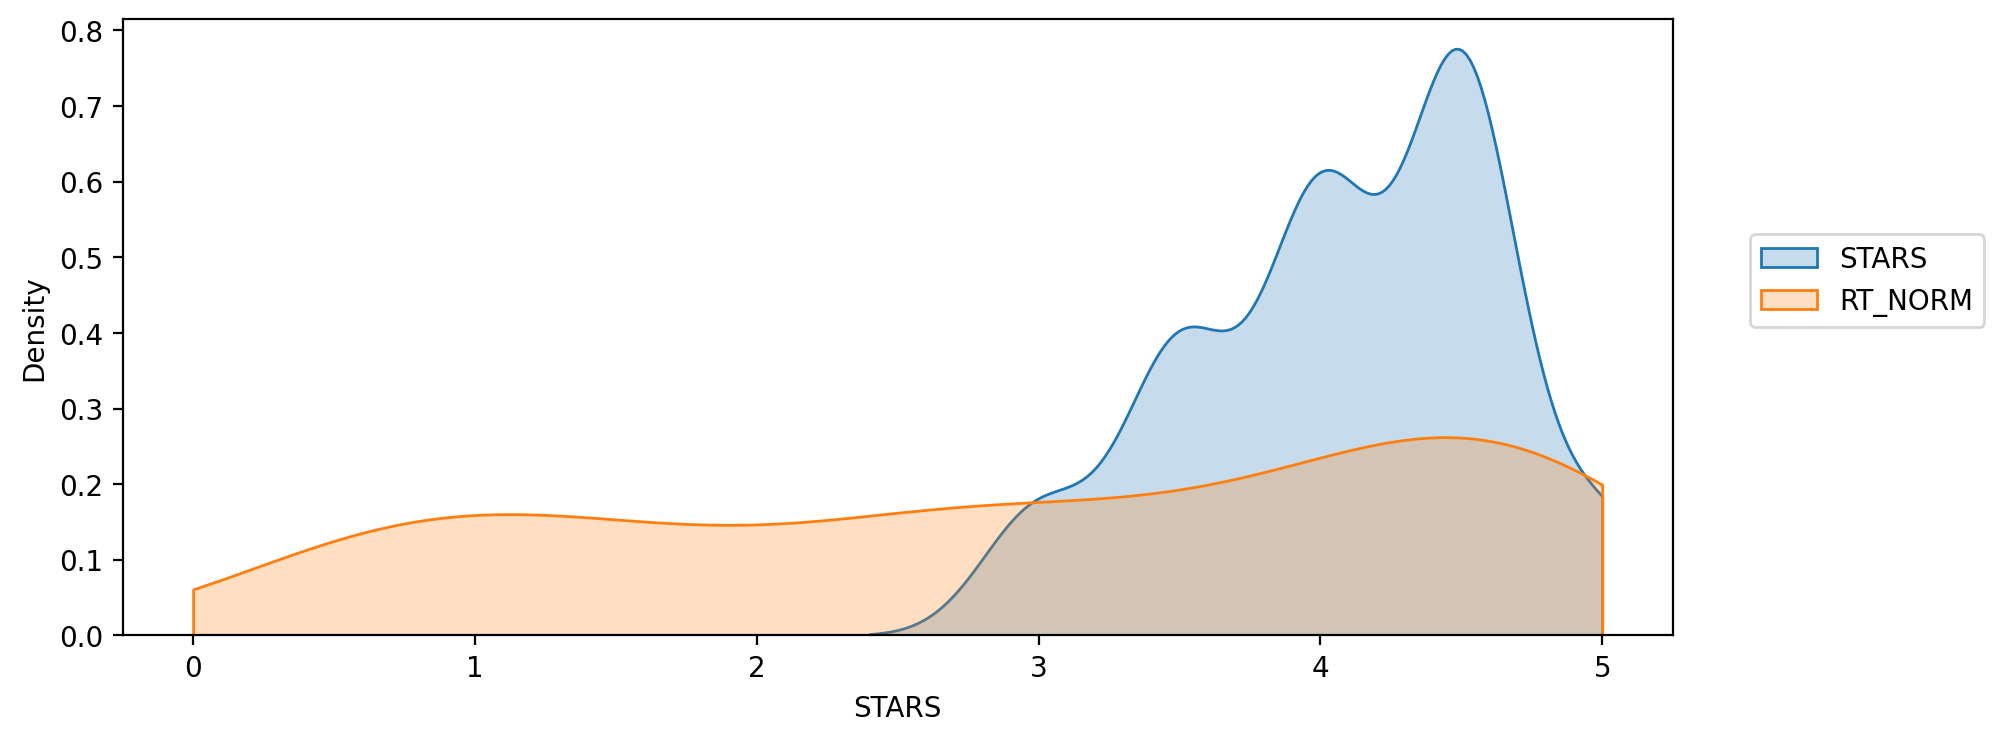

In [52]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores_df,x="STARS",clip=[0,5],fill=True,label="STARS")
sns.kdeplot(data=norm_scores_df,x="RottenTomatoes_Norm",clip=[0,5],fill=True,label="RT_NORM")

plt.legend(loc=(1.05,0.5))

## How are the worst movies rated across all platforms?

### TASK: CREATE A CLUSTERMAP VISUALIZATION OF ALL NORMALIZED SCORES.

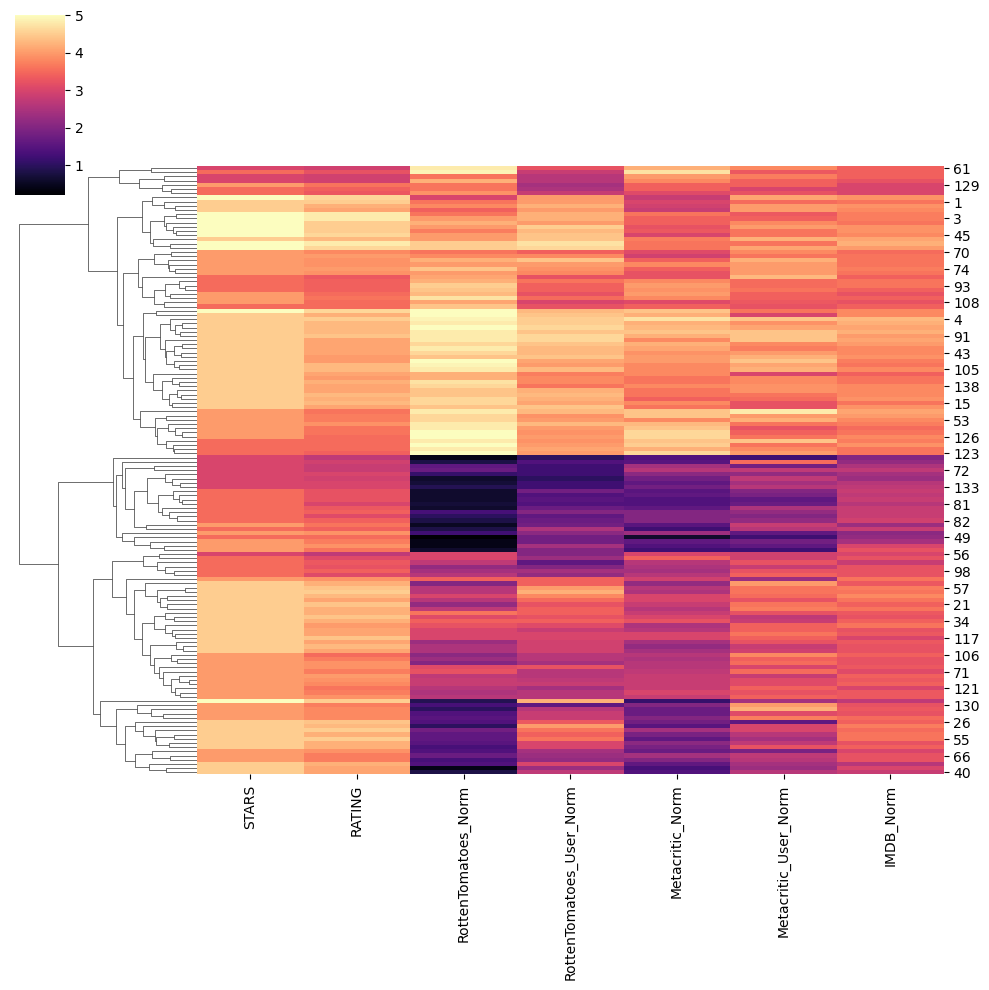

In [53]:
sns.clustermap(data=norm_scores_df,cmap="magma",col_cluster=False)

### TASK: CLEARLY FANDANGO IS RATING MOVIES MUCH HIGHER THAN OTHER SITES, ESPECIALLY CONSIDERING THAT IT IS THEN DISPLAYING A ROUNDED UP VERSION OF THE RATING. LET'S EXAMINE THE TOP 10 WORST MOVIES BASED OFF THE ROTTEN TOMATOES CRITIC RATINGS. WHAT ARE THE TOP 10 LOWEST RATED MOVIES? WHAT ARE THE MORMALIZED SCORES ACROSS ALL PLATFORMS FOR THESE MOVIES

In [54]:
norm_scores_df.columns 

Index(['STARS', 'RATING', 'RottenTomatoes_Norm', 'RottenTomatoes_User_Norm',
       'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm'],
      dtype='object')

In [55]:
norm_films_df = merged_df[['FILM','STARS', 'RATING', 'RottenTomatoes_Norm', 'RottenTomatoes_User_Norm',
       'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm']]

In [56]:
norm_films_df.head(1)

,FILM,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1


In [57]:
worst_films = norm_films_df.nsmallest(n=10,columns="RottenTomatoes_Norm")

In [58]:
worst_films

,FILM,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


### FINAL TASK: VISUALIZE THE DISTRIBUTION OF RATINGS ACROSS ALL SITES FOR THE TOP 10 WORST MOVIES

<Axes: ylabel='Density'>

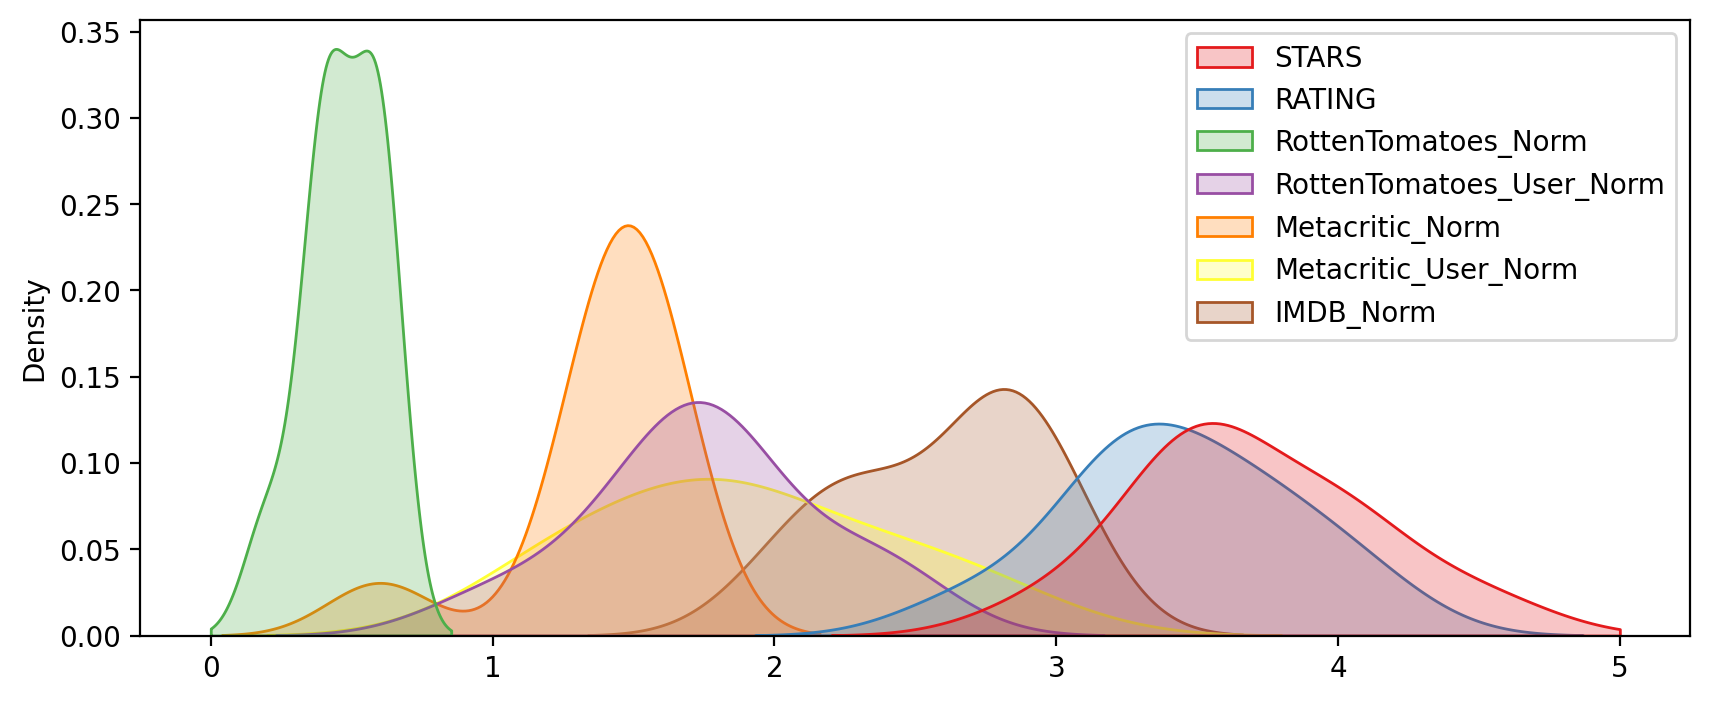

In [59]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette="Set1")